<h3><mark>outils utilisés:</mark></h3>
CUDA version: 12.2<br>
phyton version: 3.9.13<br>
pyswarms version: 1.3.0<br>
torch version: 2.0.1<br>
<hr>
numpy version: 1.24.3<br>
pandas version: 1.4.4<br>
matplotlib version: 3.5.2<br>
seaborn version: 0.11.2<br>
scikit-learn version: 1.0.2<br>


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
import torch
from pyswarms.utils.functions import single_obj as fx
from pyswarms.single import GlobalBestPSO
import torch.nn as nn
import torch.optim as optim

df = pd.read_csv("buildingdata.csv")


In [15]:
df.head()

,Date,Id,Total electricity consumption,Air Temperature,Radiant Temperature,Operative Temperature,Outside Dry-Bulb Temperature,Glazing,Walls,Ceilings (int),...,General Lighting,Computer + Equip,Occupancy,Solar Gains Interior Windows,Solar Gains Exterior Windows,Zone Sensible Heating,Zone Sensible Cooling,Sensible Cooling,Total Cooling,Mech Vent + Nat Vent + Infiltration
0,01/01/02,1,0.54,25.80,27.12,26.46,18.92,-2.40,1.68,2.30,...,0.0,0.54,0.0,0.0,0.0,0,0.0,0.0,0.0,0.72
1,01/01/02,2,0.54,25.53,26.89,26.21,18.39,-2.62,1.89,2.30,...,0.0,0.54,0.0,0.0,0.0,0,0.0,0.0,0.0,0.72
2,01/01/02,3,0.54,25.32,26.69,26.00,18.14,-2.44,1.98,2.18,...,0.0,0.54,0.0,0.0,0.0,0,0.0,0.0,0.0,0.72
3,01/01/02,4,0.54,25.08,26.49,25.78,17.48,-2.50,2.05,2.09,...,0.0,0.54,0.0,0.0,0.0,0,0.0,0.0,0.0,0.72
4,01/01/02,5,0.54,24.72,26.24,25.48,16.41,-2.97,2.24,2.17,...,0.0,0.54,0.0,0.0,0.0,0,0.0,0.0,0.0,0.72


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 1023 non-null   object 
 1   Id                                   1023 non-null   int64  
 2   Total electricity consumption        1023 non-null   float64
 3   Air Temperature                      1023 non-null   float64
 4   Radiant Temperature                  1023 non-null   float64
 5   Operative Temperature                1023 non-null   float64
 6   Outside Dry-Bulb Temperature         1023 non-null   float64
 7   Glazing                              1023 non-null   float64
 8   Walls                                1023 non-null   float64
 9   Ceilings (int)                       1023 non-null   float64
 10  Floors (int)                         1023 non-null   float64
 11  Ground Floors                 

In [17]:
df.describe()

,Id,Total electricity consumption,Air Temperature,Radiant Temperature,Operative Temperature,Outside Dry-Bulb Temperature,Glazing,Walls,Ceilings (int),Floors (int),...,General Lighting,Computer + Equip,Occupancy,Solar Gains Interior Windows,Solar Gains Exterior Windows,Zone Sensible Heating,Zone Sensible Cooling,Sensible Cooling,Total Cooling,Mech Vent + Nat Vent + Infiltration
count,1023.000000,1023.000000,1023.000000,1023.00000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,...,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.0,1023.000000,1023.000000,1023.000000,1023.000000
mean,512.000000,14.314917,26.341564,28.85828,27.599951,23.920440,1.059394,-0.086276,0.448944,-0.484585,...,3.672805,4.224321,1.745836,0.095054,8.330753,0.0,-16.272102,-19.607830,-26.341711,2.931632
std,295.458965,18.675758,2.526243,1.65899,1.892956,4.057601,3.895191,2.593889,2.817585,3.920446,...,4.902381,4.619216,2.584452,0.125157,10.534733,0.0,21.664448,30.606465,42.360232,3.233464
min,1.000000,0.540000,23.920000,25.60000,24.760000,14.350000,-4.160000,-7.890000,-6.860000,-11.440000,...,0.000000,0.540000,0.000000,0.000000,0.000000,0.0,-65.080000,-105.480000,-182.370000,0.700000
25%,256.500000,0.540000,24.000000,27.66500,26.450000,20.540000,-2.115000,-1.880000,-1.720000,-3.105000,...,0.000000,0.540000,0.000000,0.000000,0.000000,0.0,-39.780000,-45.120000,-57.210000,0.710000
50%,512.000000,0.540000,26.070000,28.68000,26.960000,23.630000,-0.970000,0.640000,1.580000,1.180000,...,0.000000,0.540000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.720000
75%,767.500000,34.350000,27.880000,29.72500,28.245000,27.190000,4.780000,1.805000,2.300000,2.180000,...,10.210000,10.010000,3.230000,0.210000,19.130000,0.0,0.000000,0.000000,0.000000,5.260000
max,1023.000000,62.840000,34.220000,34.49000,34.310000,34.160000,10.160000,6.300000,6.100000,7.760000,...,10.210000,10.010000,6.470000,0.380000,32.660000,0.0,0.000000,0.000000,0.000000,16.390000


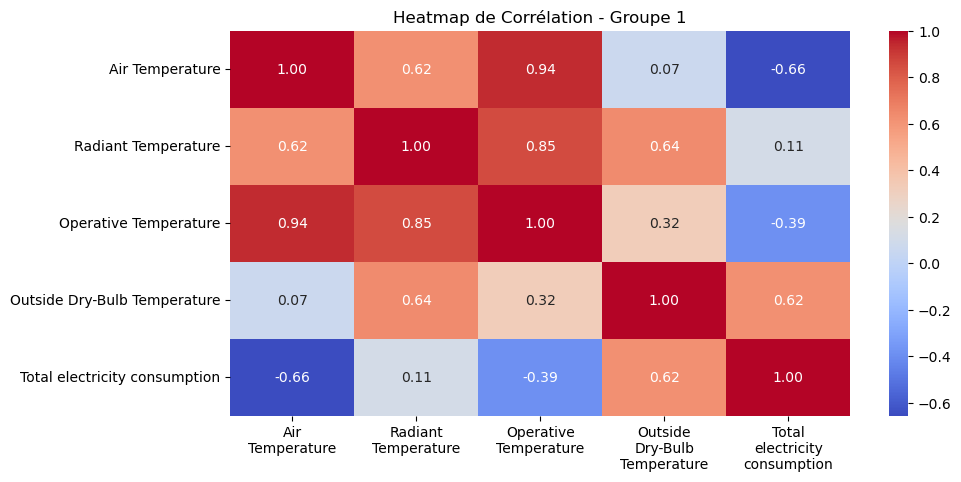

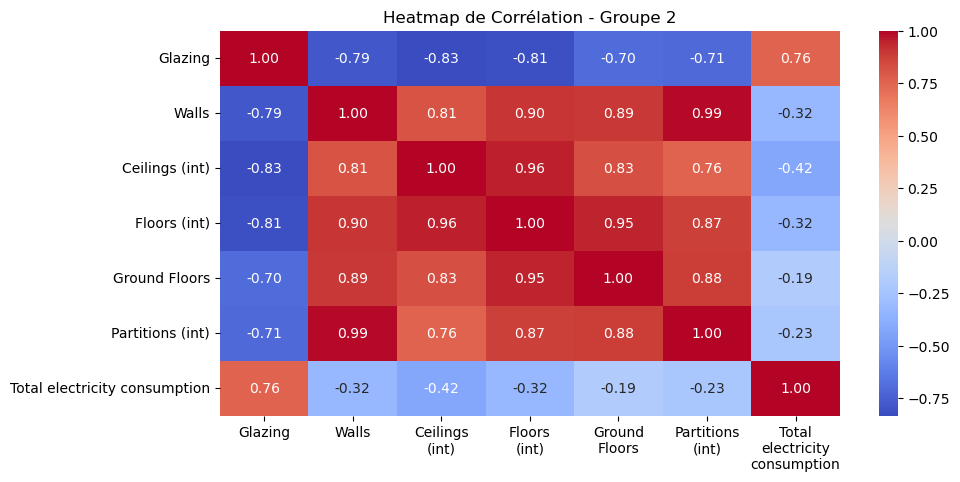

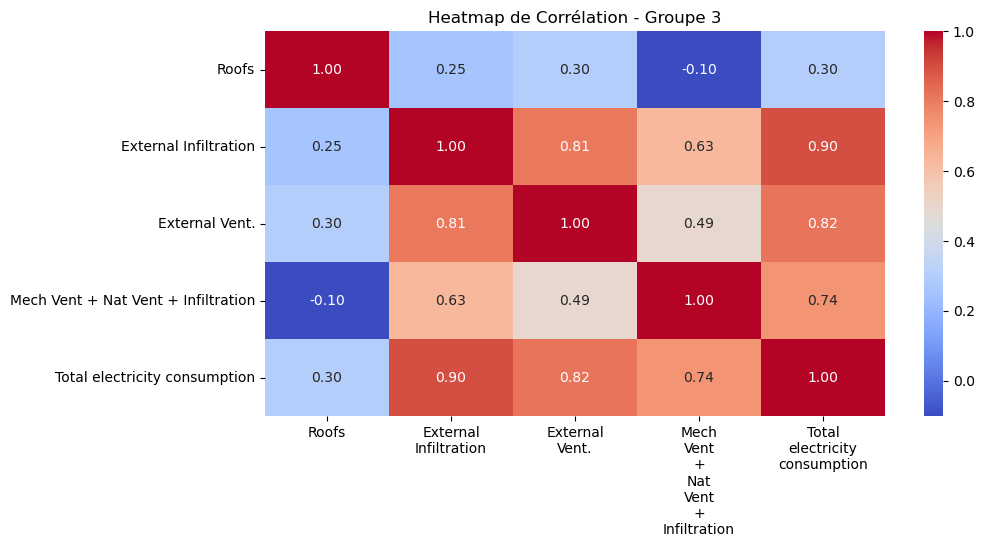

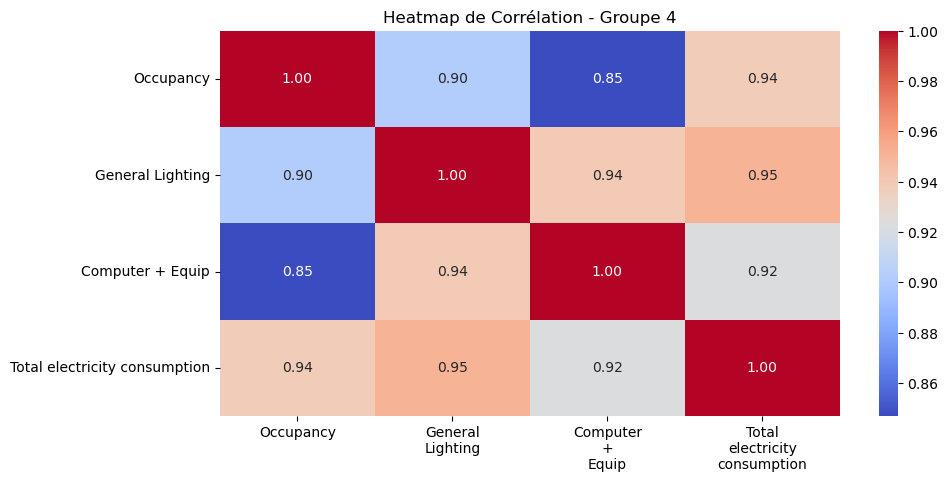

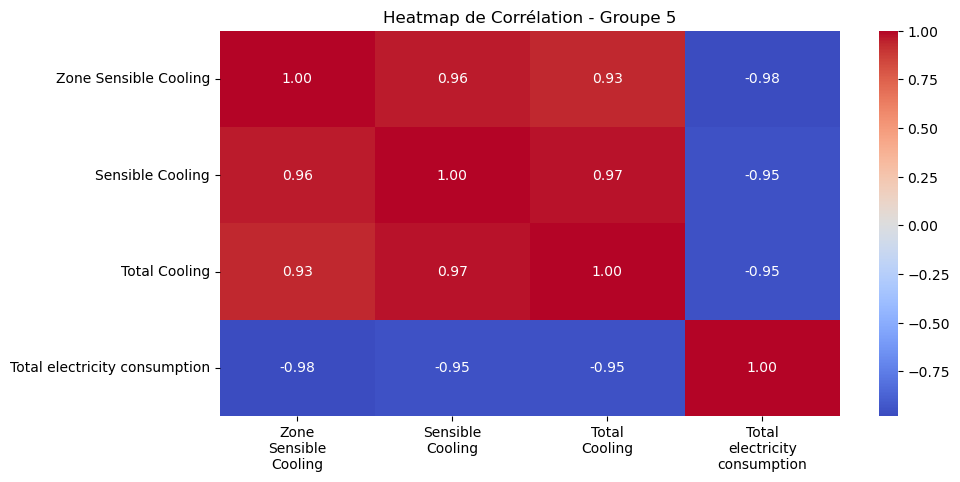

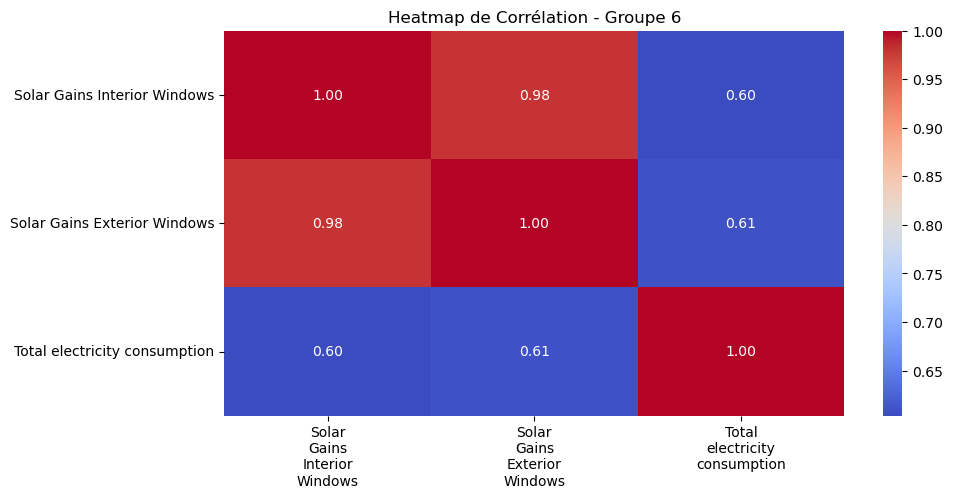

In [18]:

# Divide features into relevant groups
group1 = ['Air Temperature', 'Radiant Temperature', 'Operative Temperature', 'Outside Dry-Bulb Temperature','Total electricity consumption']
group2 = ['Glazing', 'Walls', 'Ceilings (int)', 'Floors (int)', 'Ground Floors','Partitions (int)','Total electricity consumption']
group3 = ['Roofs', 'External Infiltration', 'External Vent.', 'Mech Vent + Nat Vent + Infiltration','Total electricity consumption']
group4 = ['Occupancy', 'General Lighting', 'Computer + Equip','Total electricity consumption']
group5 = ['Zone Sensible Cooling', 'Sensible Cooling','Total Cooling','Total electricity consumption']
group6 = ['Solar Gains Interior Windows', 'Solar Gains Exterior Windows','Total electricity consumption']


# Calculate the correlation matrices for each group
corr_matrix_group1 = df[group1].corr()
corr_matrix_group2 = df[group2].corr()
corr_matrix_group3 = df[group3].corr()
corr_matrix_group4 = df[group4].corr()
corr_matrix_group5 = df[group5].corr()
corr_matrix_group6 = df[group6].corr()

# Function to divide labels on two lines
def split_labels(labels):
    return [label.replace(' ', '\n') for label in labels]
# Create the first correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_group1, annot=True, cmap='coolwarm', fmt=".2f")
ax = plt.gca()
ax.set_xticks([i + 0.5 for i in range(len(corr_matrix_group1.columns))])
ax.set_xticklabels(split_labels(corr_matrix_group1.columns), rotation=0, ha='center', va='top')
plt.title('Heatmap de Corrélation - Groupe 1')
plt.show()

# Create the second correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_group2, annot=True, cmap='coolwarm', fmt=".2f")
ax = plt.gca()
ax.set_xticks([i + 0.5 for i in range(len(corr_matrix_group2.columns))])
ax.set_xticklabels(split_labels(corr_matrix_group2.columns), rotation=0, ha='center', va='top')
plt.title('Heatmap de Corrélation - Groupe 2')
plt.show()

# Create the third correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_group3, annot=True, cmap='coolwarm', fmt=".2f")
ax = plt.gca()
ax.set_xticks([i + 0.5 for i in range(len(corr_matrix_group3.columns))])
ax.set_xticklabels(split_labels(corr_matrix_group3.columns), rotation=0, ha='center', va='top')
plt.title('Heatmap de Corrélation - Groupe 3')
plt.show()

# Create the fourth correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_group4, annot=True, cmap='coolwarm', fmt=".2f")
ax = plt.gca()
ax.set_xticks([i + 0.5 for i in range(len(corr_matrix_group4.columns))])
ax.set_xticklabels(split_labels(corr_matrix_group4.columns), rotation=0, ha='center', va='top')
plt.title('Heatmap de Corrélation - Groupe 4')
plt.show()

# Create the fifth correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_group5, annot=True, cmap='coolwarm', fmt=".2f")
ax = plt.gca()
ax.set_xticks([i + 0.5 for i in range(len(corr_matrix_group5.columns))])
ax.set_xticklabels(split_labels(corr_matrix_group5.columns), rotation=0, ha='center', va='top')
plt.title('Heatmap de Corrélation - Groupe 5')
plt.show()

# Create the sixth correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix_group6, annot=True, cmap='coolwarm', fmt=".2f")
ax = plt.gca()
ax.set_xticks([i + 0.5 for i in range(len(corr_matrix_group6.columns))])
ax.set_xticklabels(split_labels(corr_matrix_group6.columns), rotation=0, ha='center', va='top')
plt.title('Heatmap de Corrélation - Groupe 6')
plt.show()

In [19]:
# Check for missing values
missing_values = df.isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Fill missing values with mean (for numerical columns)
df.fillna(df.mean(), inplace=True)

# After filling missing values, check again for any remaining missing values
remaining_missing = df.isnull().sum().sum()
print("Remaining missing values:", remaining_missing)

# Save the cleaned dataset
df.to_csv("cleaned_data.csv", index=False)

Columns with missing values:
Series([], dtype: int64)
Remaining missing values: 0


C:\Users\anasz\AppData\Local\Temp\ipykernel_17272\3244132213.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [20]:
df["Zone Sensible Heating"]

0       0
1       0
2       0
3       0
4       0
       ..
1018    0
1019    0
1020    0
1021    0
1022    0
Name: Zone Sensible Heating, Length: 1023, dtype: int64

In [21]:
# Drop a single column
column_to_drop = "Zone Sensible Heating"
df.drop(column_to_drop, axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 1023 non-null   object 
 1   Id                                   1023 non-null   int64  
 2   Total electricity consumption        1023 non-null   float64
 3   Air Temperature                      1023 non-null   float64
 4   Radiant Temperature                  1023 non-null   float64
 5   Operative Temperature                1023 non-null   float64
 6   Outside Dry-Bulb Temperature         1023 non-null   float64
 7   Glazing                              1023 non-null   float64
 8   Walls                                1023 non-null   float64
 9   Ceilings (int)                       1023 non-null   float64
 10  Floors (int)                         1023 non-null   float64
 11  Ground Floors                 

In [23]:
df.columns

Index(['Date', 'Id', 'Total electricity consumption', 'Air Temperature',
       'Radiant Temperature', 'Operative Temperature',
       'Outside Dry-Bulb Temperature', 'Glazing', 'Walls', 'Ceilings (int)',
       'Floors (int)', 'Ground Floors', 'Partitions (int)', 'Roofs',
       'External Infiltration', 'External Vent.', 'General Lighting',
       'Computer + Equip', 'Occupancy', 'Solar Gains Interior Windows',
       'Solar Gains Exterior Windows', 'Zone Sensible Cooling',
       'Sensible Cooling', 'Total Cooling',
       'Mech Vent + Nat Vent + Infiltration'],
      dtype='object')

In [24]:
# List of selected features by correlation matrix
selected_features = ['Air Temperature',
       'Outside Dry-Bulb Temperature', 'Glazing',
       'External Infiltration', 'External Vent.', 'General Lighting',
       'Computer + Equip', 'Occupancy', 'Solar Gains Interior Windows',
       'Solar Gains Exterior Windows', 'Zone Sensible Cooling',
       'Sensible Cooling', 'Total Cooling',
       'Mech Vent + Nat Vent + Infiltration']

# Include the target column in the selected features
selected_features.append('Total electricity consumption')

selected_data = df[selected_features]

# Print the first few rows of the selected data
selected_data

,Air Temperature,Outside Dry-Bulb Temperature,Glazing,External Infiltration,External Vent.,General Lighting,Computer + Equip,Occupancy,Solar Gains Interior Windows,Solar Gains Exterior Windows,Zone Sensible Cooling,Sensible Cooling,Total Cooling,Mech Vent + Nat Vent + Infiltration,Total electricity consumption
0,25.80,18.92,-2.40,-4.84,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.54
1,25.53,18.39,-2.62,-5.04,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.54
2,25.32,18.14,-2.44,-5.07,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.54
3,25.08,17.48,-2.50,-5.38,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.54
4,24.72,16.41,-2.97,-5.90,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,24.00,28.31,7.49,2.93,3.62,10.21,10.01,6.47,0.30,27.58,-47.08,-69.06,-73.08,6.68,38.55
1019,24.00,29.90,8.57,3.96,4.91,10.21,10.01,6.47,0.35,24.51,-52.33,-82.43,-92.22,6.70,42.80
1020,24.00,30.14,8.25,4.10,3.77,10.21,10.01,4.85,0.33,21.29,-51.48,-75.03,-93.88,5.22,42.65
1021,24.00,29.29,7.72,3.55,4.34,10.21,10.01,4.85,0.30,22.22,-52.80,-73.16,-95.55,5.42,43.02


In [25]:
# Define the target variable
target = "Total electricity consumption"

# Select the features and target
X = selected_data
y = selected_data[target]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X[selected_features[:-1]], y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform training, validation, and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with appropriate column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features[:-1])
X_val_scaled = pd.DataFrame(X_val_scaled, columns=selected_features[:-1])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features[:-1])

# Display the first few rows of the scaled training data
X_train_scaled.head()


,Air Temperature,Outside Dry-Bulb Temperature,Glazing,External Infiltration,External Vent.,General Lighting,Computer + Equip,Occupancy,Solar Gains Interior Windows,Solar Gains Exterior Windows,Zone Sensible Cooling,Sensible Cooling,Total Cooling,Mech Vent + Nat Vent + Infiltration
0,0.049709,-0.508789,-0.691214,-0.471755,-0.488674,-0.743737,-0.787343,-0.667534,-0.767199,-0.799716,0.741182,0.628728,0.612649,-0.672751
1,-0.941689,1.853427,2.243417,2.113502,3.547112,1.344561,1.270094,1.900405,2.066348,1.751652,-1.843034,-2.467117,-1.938188,1.169837
2,1.013458,0.568713,0.920802,-0.033629,-0.488674,-0.743737,-0.787343,-0.667534,1.436671,1.574657,0.741182,0.628728,0.612649,-0.672751
3,-0.941689,0.393192,0.283611,0.867482,-0.102474,1.344561,1.270094,0.614451,-0.137522,-0.061608,-1.266383,-0.928442,-1.335847,0.250091
4,-0.941689,-1.352264,-0.769911,-0.679943,-0.488674,1.344561,1.270094,-0.024557,-0.688489,-0.743228,-0.096312,0.628728,0.612649,0.339898


In [27]:
import numpy as np
import torch
from pyswarms.utils.functions import single_obj as fx
from pyswarms.single import GlobalBestPSO
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, num_hidden_layers, num_neurons_per_layer, learning_rate, l2_weight):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        input_size = len(selected_features) - 1

        # Input layer
        self.layers.append(nn.Linear(input_size, num_neurons_per_layer))
        self.layers.append(nn.LeakyReLU(negative_slope=0.01))

        # Hidden layers
        for _ in range(num_hidden_layers - 1):
            self.layers.append(nn.Linear(num_neurons_per_layer, num_neurons_per_layer))
            self.layers.append(nn.LeakyReLU(negative_slope=0.01))

        # Output layer
        self.layers.append(nn.Linear(num_neurons_per_layer, 1))

        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()

        self.l2_weight = l2_weight
        # Print layer information for linear layers only
        #for i, layer in enumerate(self.layers):
        #    if isinstance(layer, nn.Linear):
        #        print(f"Layer {i}: Input Size = {layer.in_features}, Output Size = {layer.out_features}")

        

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            #print("Layer output shape:", x.shape)  # Add this line to print the tensor shape
        return x
    

    def compute_regularization_loss(self):
        l2_loss = 0.0

        for param in self.parameters():
            l2_loss += torch.sum(param ** 2)

        return 0.5 * self.l2_weight * l2_loss

y_train_array = np.array(y_train).reshape(-1, 1)
y_val_array = np.array(y_val).reshape(-1, 1)
def objective_function(hyperparameters):
    num_particles, num_dimensions = hyperparameters.shape
    # Initialize an array to store validation losses for each particle
    validation_losses = np.zeros(num_particles)
    for i in range(num_particles):
        num_hidden_layers = int(hyperparameters[i, 0])
        num_neurons_per_layer = int(hyperparameters[i, 1])
        log_learning_rate = hyperparameters[i, 2]
        learning_rate = 10 ** log_learning_rate
        l2_weight = hyperparameters[i, 3]
        # Reset model and optimizer for each run
        model = NeuralNetwork(num_hidden_layers, num_neurons_per_layer, learning_rate, l2_weight)
        if torch.cuda.is_available():
            model.cuda()
        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val_array, dtype=torch.float32)
        if torch.cuda.is_available():
            X_train_tensor, y_train_tensor = X_train_tensor.cuda(), y_train_tensor.cuda()
            X_val_tensor, y_val_tensor = X_val_tensor.cuda(), y_val_tensor.cuda()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        criterion = torch.nn.MSELoss()
        num_epochs = 50
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            # Add regularization loss
            regularization_loss = model.compute_regularization_loss()
            total_loss = loss + regularization_loss
            total_loss.backward()
            optimizer.step()
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
        validation_losses[i] = val_loss.item()
    return validation_losses

# Modified hyperparameter ranges
hyperparameters = [(1, 6), (16, 512), (-6, -2), (1e-6, 1e-2)]



options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=4, options=options)

# Perform PSO optimization with more iterations
best_objective, best_hyperparameters = optimizer.optimize(objective_function, iters=50)

# Convert best_hyperparameters to a NumPy array
best_hyperparameters = np.array(best_hyperparameters)

# Update the best hyperparameters extraction
best_num_hidden_layers = int(best_hyperparameters[0])
best_num_neurons_per_layer = int(best_hyperparameters[1])
best_log_learning_rate = int(best_hyperparameters[2])
best_learning_rate = 10 ** best_log_learning_rate
best_l2_weight = best_hyperparameters[3]

# Create the best neural network based on the best hyperparameters
best_model = NeuralNetwork(
    best_num_hidden_layers, best_num_neurons_per_layer,best_learning_rate,best_l2_weight)

# Transfer the model to CUDA if available
if torch.cuda.is_available():
    best_model.cuda()

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_array, dtype=torch.float32)

if torch.cuda.is_available():
    X_train_tensor, y_train_tensor = X_train_tensor.cuda(), y_train_tensor.cuda()
    X_val_tensor, y_val_tensor = X_val_tensor.cuda(), y_val_tensor.cuda()

# Define the loss function (Mean Squared Error) and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(best_model.parameters(), lr=best_learning_rate)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    best_model.train()
    optimizer.zero_grad()
    outputs = best_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    regularization_loss = best_model.compute_regularization_loss()
    total_loss = loss + regularization_loss
    total_loss.backward()
    optimizer.step()

# Validation loop
best_model.eval()
with torch.no_grad():
    val_outputs = best_model(X_val_tensor)
    val_loss = criterion(val_outputs, y_val_tensor)

# Print the validation loss of the best model
print("Validation Loss (Best Model):", val_loss.item())


2023-09-14 09:34:36,853 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50

c:\Users\anasz\anaconda3\lib\site-packages\torch\nn\init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=1.31
2023-09-14 09:37:33,969 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3148705959320068, best pos: [1.1900185  1.59897076 0.3732212  0.80146206]


Validation Loss (Best Model): 5.725288391113281


In [28]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for model evaluation
def evaluate_model(model, X, y):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_true = torch.tensor(y, dtype=torch.float32)
        # If GPU is available, move data to GPU
        if torch.cuda.is_available():
            X_tensor = X_tensor.cuda()
            y_true = y_true.cuda()
        # Make predictions
        y_pred = model(X_tensor)
        # Convert predictions and true labels back to CPU if necessary
        y_pred = y_pred.cpu().numpy()
        y_true = y_true.cpu().numpy()
        # Calculate Mean Squared Error (MSE) and R-squared (R²)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return mse, r2
mse_val, r2_val = evaluate_model(best_model, X_val_scaled.values, y_val.values)
print("Validation MSE:", mse_val)
print("Validation R-squared (R²):", r2_val)

Validation MSE: 5.7252884
Validation R-squared (R²): 0.9853181900024929


Scatter plot

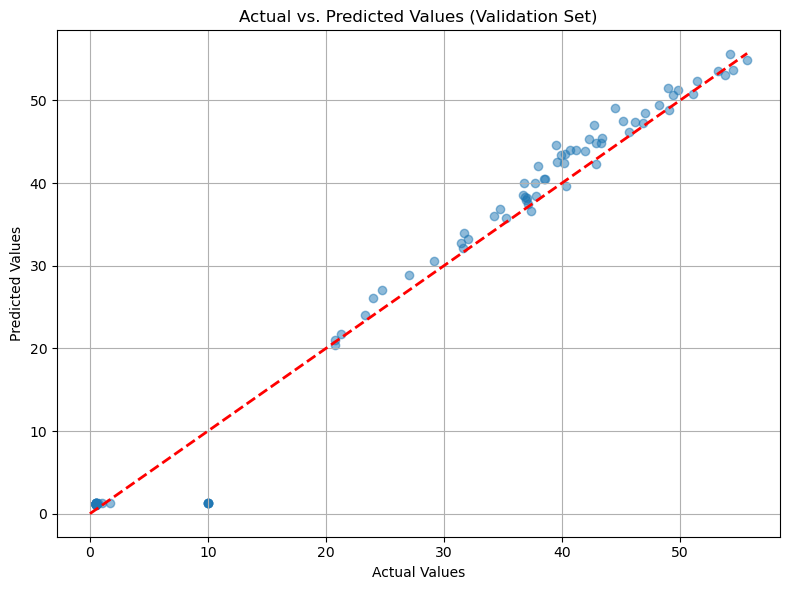

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Converting the PyTorch tensors to NumPy arrays
y_val_actual = y_val_tensor.cpu().numpy()
y_val_predicted = val_outputs.cpu().numpy()

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val_actual, y_val_predicted, alpha=0.5)
plt.title("Actual vs. Predicted Values (Validation Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Adding a diagonal line for reference (perfect predictions)
max_value = max(np.max(y_val_actual), np.max(y_val_predicted))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', lw=2)

plt.grid(True)
plt.tight_layout()
plt.show()


Validation Loss (Best Model): 3.2490737438201904


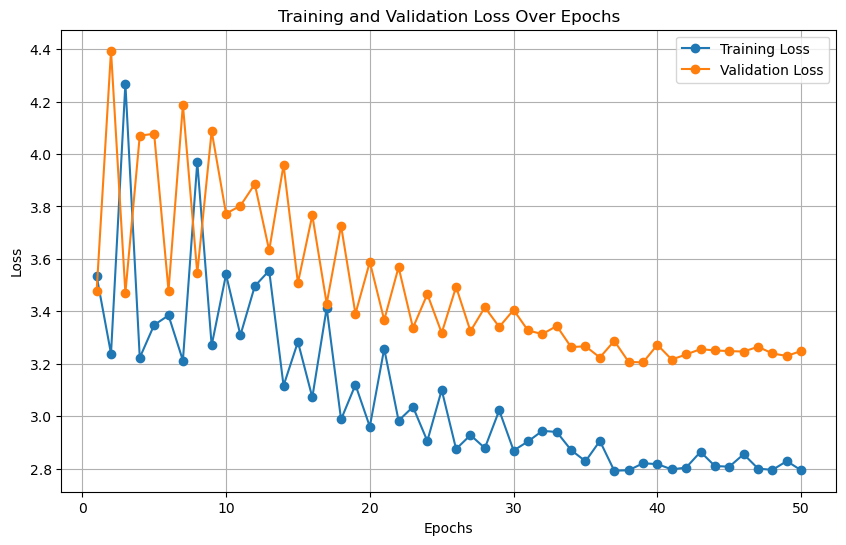

In [17]:
import numpy as np
import torch
from pyswarms.utils.functions import single_obj as fx
from pyswarms.single import GlobalBestPSO
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt  

# Initialize empty lists to store training and validation losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    best_model.train()
    optimizer.zero_grad()
    outputs = best_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    regularization_loss = best_model.compute_regularization_loss()
    total_loss = loss + regularization_loss
    total_loss.backward()
    optimizer.step()

    # Append training loss to the list
    train_losses.append(loss.item())  # Record training loss

    # Validation loop
    best_model.eval()
    with torch.no_grad():
        val_outputs = best_model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    # Append validation loss to the list
    val_losses.append(val_loss.item())  # Record validation loss

# Print the validation loss of the best model
print("Validation Loss (Best Model):", val_loss.item())

# Create an array of epoch numbers for the x-axis
epochs = range(1, num_epochs + 1)

# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


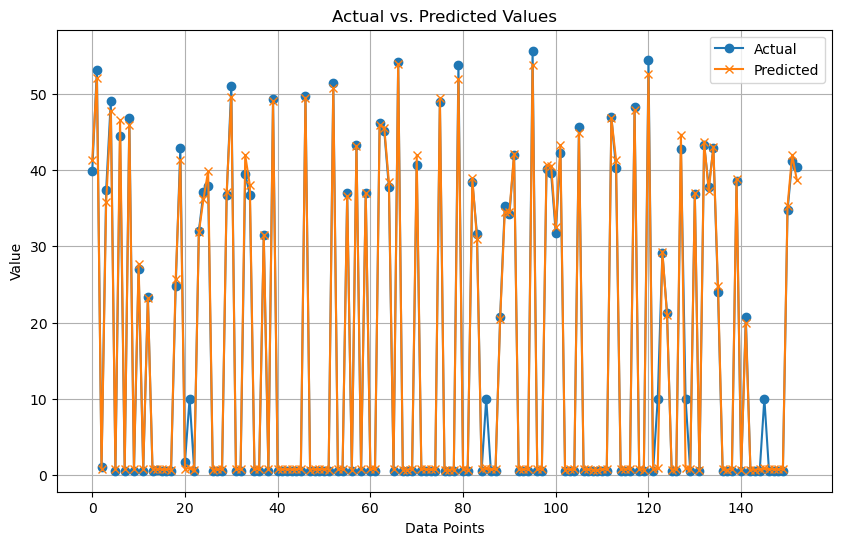

In [18]:
import numpy as np
import torch
from pyswarms.utils.functions import single_obj as fx
from pyswarms.single import GlobalBestPSO
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Training loop
for epoch in range(num_epochs):
    best_model.train()
    optimizer.zero_grad()
    outputs = best_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    regularization_loss = best_model.compute_regularization_loss()
    total_loss = loss + regularization_loss
    total_loss.backward()
    optimizer.step()

    # Validation loop
    best_model.eval()
    with torch.no_grad():
        val_outputs = best_model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

# After training, make predictions on validation data
best_model.eval()
with torch.no_grad():
    val_outputs = best_model(X_val_tensor)

# Convert the predicted values back to NumPy arrays
y_val_true = y_val_tensor.cpu().numpy()
y_val_pred = val_outputs.cpu().numpy()

# Create an array of data points for the x-axis
data_points = range(len(y_val_true))

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(data_points, y_val_true, label='Actual', marker='o')
plt.plot(data_points, y_val_pred, label='Predicted', marker='x')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
